In [1]:
from ucimlrepo import fetch_ucirepo

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr

In [2]:
# fetch dataset 
metro_interstate_traffic_volume = fetch_ucirepo(id=492) 
  
# data (as pandas dataframes) 
X = metro_interstate_traffic_volume.data.features 
y = metro_interstate_traffic_volume.data.targets 
  
# metadata 
print(metro_interstate_traffic_volume.metadata) 
  
# variable information 
print(metro_interstate_traffic_volume.variables) 

{'uci_id': 492, 'name': 'Metro Interstate Traffic Volume', 'repository_url': 'https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume', 'data_url': 'https://archive.ics.uci.edu/static/public/492/data.csv', 'abstract': 'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 48204, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['traffic_volume'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5X60B', 'creators': ['John Hogue'], 'intro_paper': None, 'additional_info': {'summary': 'Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weath

In [4]:
X['holiday'].value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [5]:
X['holiday'] = X['holiday'].fillna(0)

C:\Users\Marcell\AppData\Local\Temp\ipykernel_21948\2006306981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['holiday'] = X['holiday'].fillna(0)


In [6]:
X['holiday'] = np.where(X['holiday'] == 0, 0, 1)

C:\Users\Marcell\AppData\Local\Temp\ipykernel_21948\2459300454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['holiday'] = np.where(X['holiday'] == 0, 0, 1)


In [8]:
y

,traffic_volume
0,5545
1,4516
2,4767
3,5026
4,4918
...,...
48199,3543
48200,2781
48201,2159
48202,1450


In [9]:
df_full = pd.concat([X, y], axis=1)

In [10]:
df_full.head(1)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545


In [28]:
selected_vars = [0, 1, 2, 3, 4, 8]
start_time = 0
end_time = 168*52

In [29]:
df_filtered = df_full.iloc[start_time:end_time, selected_vars]

In [30]:
df_full_pp = pp.DataFrame(df_filtered.values, 
                         datatime = {0:np.arange(len(df_filtered))}, 
                         var_names=df_filtered.columns)

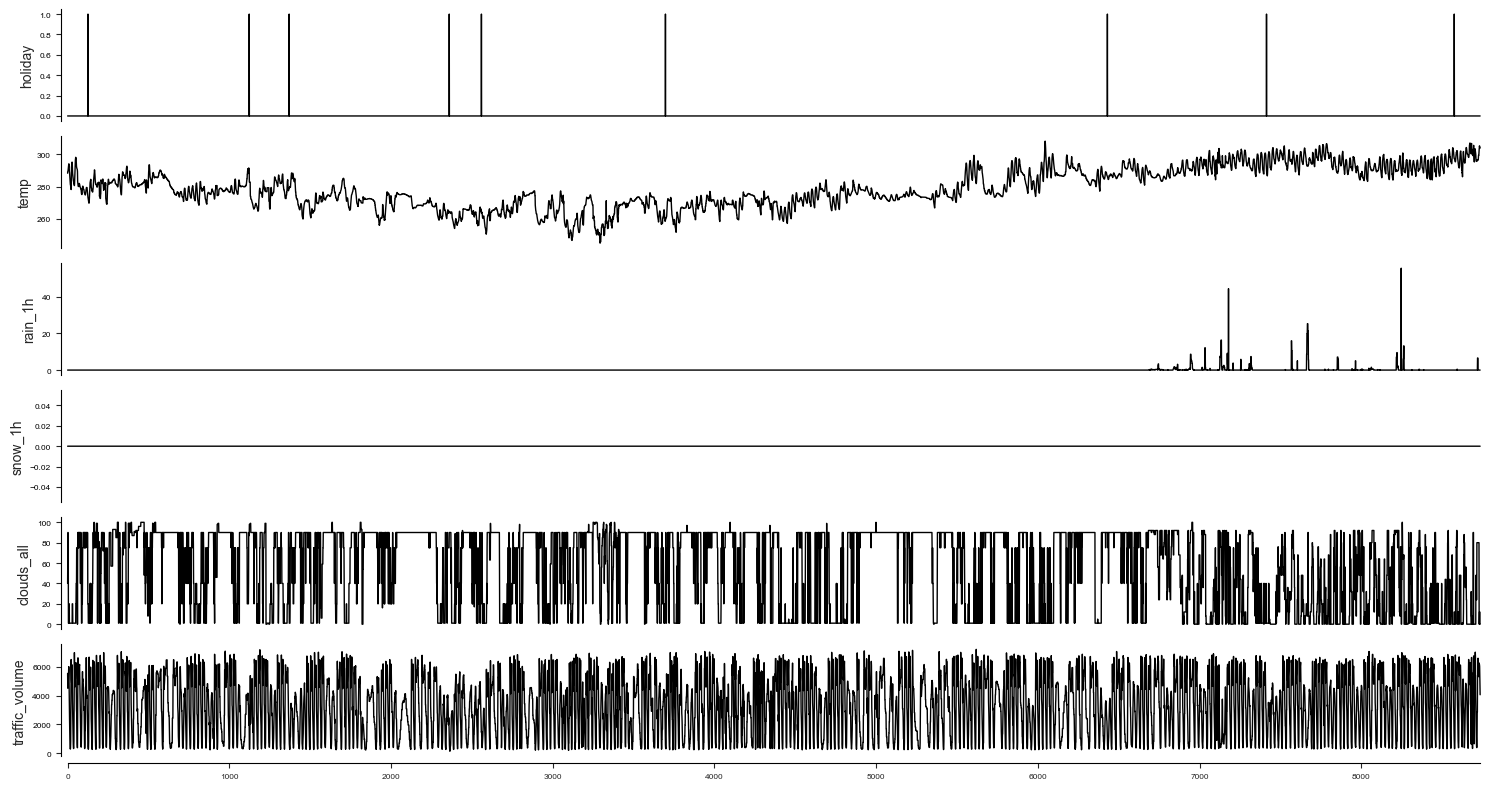

In [31]:
tp.plot_timeseries(df_full_pp, figsize=(15, 8))
plt.show()

In [32]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=df_full_pp, 
    cond_ind_test=parcorr,
    verbosity=1)
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


In [33]:
correlations.shape

(6, 6, 21)

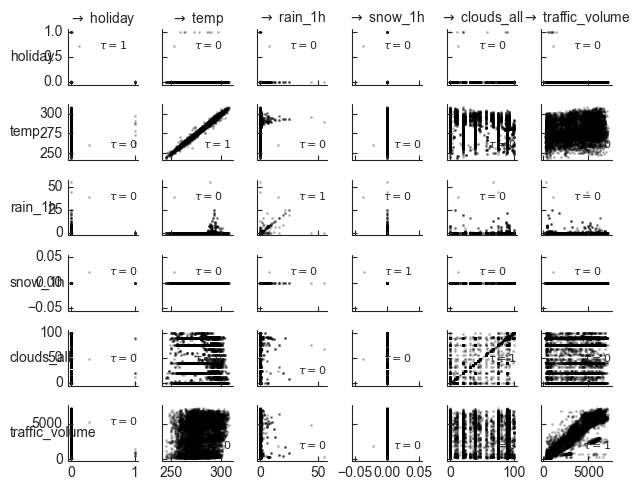

In [34]:
matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=df_full_pp, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()

In [35]:
# tp.plot_densityplots(dataframe=df_full_pp, add_densityplot_args={'matrix_lags':matrix_lags})
# plt.show()

In [36]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=df_full_pp, 
    cond_ind_test=parcorr,
    verbosity=1)

In [37]:
#correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
#lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names': df_filtered.columns, 
#                                    'x_base':5, 'y_base':.5}); #plt.show()

In [38]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=10, pc_alpha=None, alpha_level=0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 10
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




c:\Users\Marcell\.conda\envs\tscf\lib\site-packages\tigramite\independence_tests\parcorr.py:319: RuntimeWarning: divide by zero encountered in log
  score = T * np.log(rss) + 2. * p



## Resulting lagged parent (super)sets:

    Variable holiday has 2 link(s):
    [pc_alpha = 0.3]
        (traffic_volume -1): max_pval = 0.03623, |min_val| =  0.022
        (traffic_volume -8): max_pval = 0.27747, |min_val| =  0.012

    Variable temp has 17 link(s):
    [pc_alpha = 0.4]
        (temp -1): max_pval = 0.00000, |min_val| =  0.795
        (temp -3): max_pval = 0.00000, |min_val| =  0.117
        (temp -2): max_pval = 0.00000, |min_val| =  0.091
        (temp -10): max_pval = 0.00000, |min_val| =  0.055
        (rain_1h -8): max_pval = 0.00094, |min_val| =  0.035
        (traffic_volume -7): max_pval = 0.00337, |min_val| =  0.031
        (traffic_volume -10): max_pval = 0.00496, |min_val| =  0.030
        (temp -5): max_pval = 0.00980, |min_val| =  0.028
        (traffic_volume -2): max_pval = 0.02880, |min_val| =  0.023
        (clouds_all -9): max_pval = 0.03377, |min_val| =  0.023
        (traffic_volume -1): max_pval = 0.03968, |min_val| =  0.022
        (clouds_all 

In [39]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=10, fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)
graph = pcmci.get_graph_from_pmatrix(p_matrix=q_matrix, alpha_level=0.01, 
            tau_min=0, tau_max=10, link_assumptions=None)
results['graph'] = graph


## Significant links at alpha = 0.01:

    Variable holiday has 0 link(s):

    Variable temp has 9 link(s):
        (temp -1): pval = 0.00000 | val =  0.793
        (temp -2): pval = 0.00000 | val = -0.089
        (traffic_volume  0): pval = 0.00000 | val =  0.076
        (temp -3): pval = 0.00000 | val = -0.073
        (rain_1h -8): pval = 0.00002 | val =  0.053
        (temp -5): pval = 0.00007 | val = -0.050
        (temp -4): pval = 0.00033 | val = -0.046
        (clouds_all  0): pval = 0.00012 | val =  0.041
        (rain_1h  0): pval = 0.00229 | val = -0.033

    Variable rain_1h has 7 link(s):
        (rain_1h -1): pval = 0.00000 | val =  0.378
        (rain_1h -2): pval = 0.00000 | val =  0.176
        (rain_1h -3): pval = 0.00000 | val =  0.070
        (rain_1h -9): pval = 0.00004 | val = -0.051
        (rain_1h -4): pval = 0.00735 | val =  0.037
        (temp  0): pval = 0.00229 | val = -0.033
        (clouds_all  0): pval = 0.00453 | val =  0.030

    Variable snow_1h has 

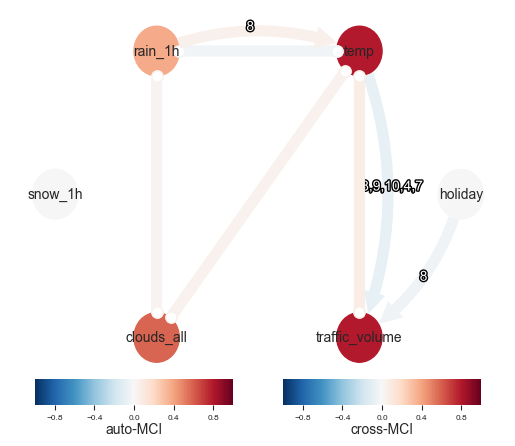

In [40]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=df_filtered.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()

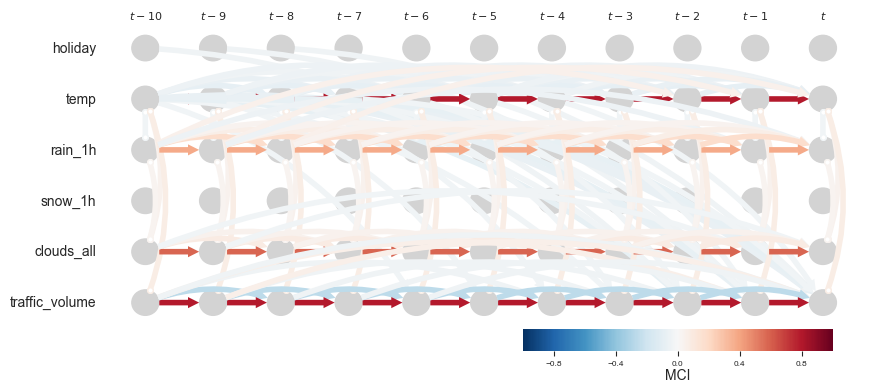

In [41]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(10, 4),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=df_filtered.columns,
    link_colorbar_label='MCI',
    ); plt.show()